# 任务三 分析

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_excel('/mnt/d/Documents/数学建模国赛/C题目/附件1.xlsx')

In [4]:
df = df.set_index('eventid')
df = df.loc[201501010001:, :]

In [5]:
df.columns

Index(['iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution',
       'country', 'country_txt', 'region', 'region_txt',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=134)

In [6]:
# df.groupby('gname').count()

画饼状图示例

(-1.1033339060596237,
 1.1317542250088253,
 -1.1274411557938386,
 1.1013067217044685)

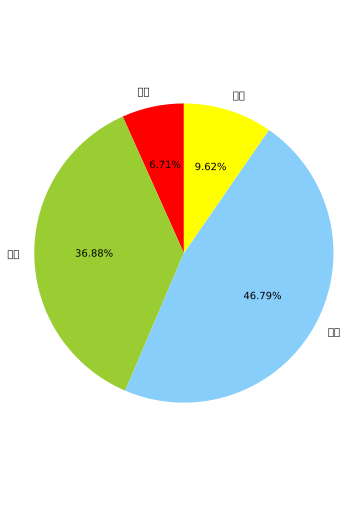

In [11]:
plt.figure(figsize=(6,9)) #调节图形大小
labels = [u'大型',u'中型',u'小型',u'微型'] #定义标签
sizes = [46,253,321,66] #每块值
colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
explode = (0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.show()

# 近三年前十恐怖组织
## 按组织分析

In [7]:
gnames = df.gname
gnames = [s.split()[0] for s in gnames]

result_gname = sorted(Counter(gnames).items(), key=lambda item:item[1], reverse=True)

In [13]:
Counter([v for v in df.gname if v.startswith('Revolutionary')])

Counter({'Revolutionary Armed Forces of Colombia (FARC)': 89,
         'Revolutionary Movement for National Salvation (REMNASA)': 3,
         'Revolutionary Punishment Movement': 11,
         'Revolutionary Struggle': 1,
         'Revolutionary Army': 1,
         'Revolutionary Cells Network (SRN)': 3,
         'Revolutionary Communist Centre (RCC)': 1,
         'Revolutionary Armed Forces of Colombia (FARC) dissidents': 20})

In [9]:
result_gname = {k:v for k,v in result_gname}
others = np.sum([value for key, value in result_gname.items() if value < 380])
print(others)
result_gname = {k:v for k,v in result_gname.items() if v > 380}
result_gname['Ohters'] = others

print(result_gname.keys())
result_gname

8634
dict_keys(['Unknown', 'Islamic', 'Taliban', 'Al-Shabaab', 'Boko', 'Houthi', 'Kurdistan', 'New', 'Maoists', 'Sinai', 'Communist', 'Ohters'])


{'Unknown': 16715,
 'Islamic': 4078,
 'Taliban': 3209,
 'Al-Shabaab': 1531,
 'Boko': 1113,
 'Houthi': 892,
 'Kurdistan': 873,
 'New': 853,
 'Maoists': 747,
 'Sinai': 426,
 'Communist': 382,
 'Ohters': 8634}

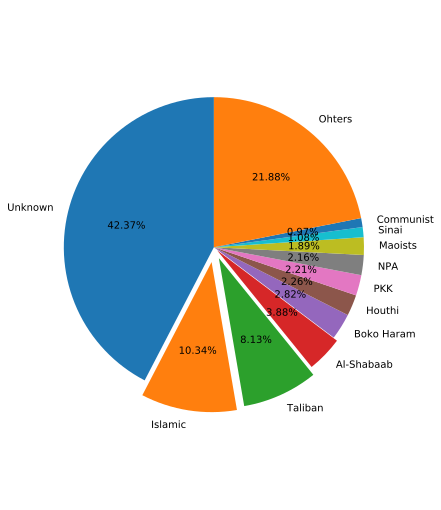

['Unknown', 'Islamic', 'Taliban', 'Al-Shabaab', 'Boko Haram', 'Houthi', 'PKK', 'NPA', 'Maoists', 'Sinai', 'Communist', 'Ohters']
[16715, 4078, 3209, 1531, 1113, 892, 873, 853, 747, 426, 382, 8634]


In [10]:
plt.figure(figsize=(6,9)) #调节图形大小
labels =  ['Unknown', 'Islamic', 'Taliban', 'Al-Shabaab', 'Boko Haram', 'Houthi', 'PKK', 'NPA', 'Maoists', 'Sinai', 'Communist', 'Ohters'] #定义标签
sizes = list(result_gname.values()) #每块值
colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
explode = (0,0.1,0.08,0.03,0,0,0,0,0,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
#                       colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.show()
print(labels)
print(sizes)

## 按地区分析

In [11]:
df15 = df.loc[201501010001:201601010001, :]
df16 = df.loc[201601010001:201701010001, :]
df17 = df.loc[201701010001:, :]

In [12]:
region15 = df15.region

result_region15 = sorted(Counter(region15).items(), key=lambda item:item[1], reverse=True)
result_region15 = {k:v for k,v in result_region15}

result_region15

{10: 6034,
 6: 4586,
 11: 1964,
 5: 1073,
 9: 683,
 8: 333,
 3: 176,
 1: 62,
 4: 28,
 12: 14,
 7: 10,
 2: 1}

In [13]:
region16 = df16.region

result_region16 = sorted(Counter(region16).items(), key=lambda item:item[1], reverse=True)
result_region16 = {k:v for k,v in result_region16}

result_region16

{10: 6117,
 6: 3641,
 11: 2079,
 5: 1077,
 8: 273,
 3: 159,
 9: 134,
 1: 75,
 7: 17,
 12: 10,
 4: 8,
 2: 3}

In [14]:
region17 = df17.region

result_region17 = sorted(Counter(region17).items(), key=lambda item:item[1], reverse=True)
result_region17 = {k:v for k,v in result_region17}

result_region17

{10: 3780,
 6: 3429,
 11: 1968,
 5: 1020,
 8: 291,
 3: 172,
 9: 110,
 1: 97,
 12: 12,
 7: 7,
 4: 7,
 2: 4}

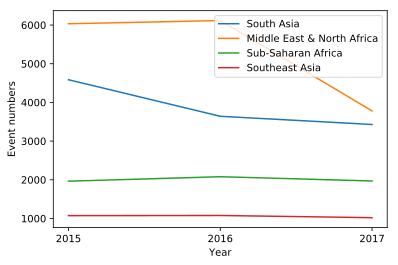

In [15]:

plt.plot([2015,2016,2017],[result_region15.get(6),result_region16.get(6),result_region17.get(6)],label='South Asia')
plt.plot([2015,2016,2017],[result_region15.get(10),result_region16.get(10),result_region17.get(10)],label='Middle East & North Africa')
plt.plot([2015,2016,2017],[result_region15.get(11),result_region16.get(11),result_region17.get(11)],label='Sub-Saharan Africa')
plt.plot([2015,2016,2017],[result_region15.get(5),result_region16.get(5),result_region17.get(5)],label='Southeast Asia')
plt.xticks([2015,2016,2017])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Event numbers')
plt.show()
region15.get(6)

In [16]:
l = [5 , 6 , 10 , 11]
print('东南亚 南亚 撒哈拉以南的非洲 中东和北亚')
for i in l:
    print([result_region15.get(i),result_region16.get(i),result_region17.get(i)])

东南亚 南亚 撒哈拉以南的非洲 中东和北亚
[1073, 1077, 1020]
[4586, 3641, 3429]
[6034, 6117, 3780]
[1964, 2079, 1968]


## 目标分析
主要以平民 士兵 车辆 检查点 港口 村庄

In [17]:
sorted(Counter(df.target1).items(), key=lambda item:item[1], reverse=True)

[('Unknown', 3018),
 ('Civilians', 2626),
 ('Soldiers', 1887),
 ('Vehicle', 1290),
 ('Checkpoint', 1227),
 ('Patrol', 1085),
 ('Village', 995),
 ('Officers', 809),
 ('Market', 672),
 ('Convoy', 603),
 ('House', 479),
 ('Base', 448),
 ('Neighborhood', 434),
 ('Checkpost', 402),
 ('Post', 380),
 ('Civilian', 357),
 ('Shops', 339),
 ('Police Station', 335),
 ('Mosque', 305),
 ('Town', 299),
 ('Headquarters', 286),
 ('Members', 285),
 ('Area', 264),
 ('Forces', 263),
 ('Bus', 254),
 ('Office', 211),
 ('Soldier', 192),
 ('Officer', 189),
 ('School', 181),
 ('Posts', 181),
 ('District', 174),
 ('City', 162),
 ('Camp', 158),
 ('Restaurant', 156),
 ('Vehicles', 151),
 ('Power Pylon', 151),
 ('Checkpoints', 149),
 ('Residence', 144),
 ('Building', 139),
 ('Church', 133),
 ('Outpost', 119),
 ('Cafe', 100),
 ('Power Pole', 89),
 ('Houses', 87),
 ('Checkposts', 86),
 ('Stores', 85),
 ('Shop', 80),
 ('Truck', 76),
 ('Railway Tracks', 76),
 ('Hospital', 76),
 ('Employees', 75),
 ('Gas Pipeline', 72)

## 目标类型
主要以公民自身财产安全(14),军事政府警察(432)，商业(1)，宗教人物/机构(15)

In [18]:
sorted(Counter(df.targtype1).items(), key=lambda item:item[1], reverse=True)

[(14, 11502),
 (4, 7920),
 (3, 5361),
 (2, 3114),
 (20, 3019),
 (1, 2832),
 (15, 934),
 (17, 812),
 (21, 762),
 (19, 755),
 (8, 656),
 (22, 484),
 (10, 446),
 (7, 340),
 (12, 159),
 (16, 122),
 (6, 73),
 (11, 52),
 (13, 40),
 (9, 39),
 (18, 24),
 (5, 7)]

## 动机分析

In [19]:
sorted(Counter(df.motive).items(), key=lambda item:item[1], reverse=True)

[(nan, 33614),
 ("The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.",
  297),
 ("The specific motive is unknown; however, sources suspected that the attack, which targeted members of the Sunni community, may have been part of a larger trend of sectarian violence between Iraq's minority Sunni and majority Shiite communities.",
  52),
 ('The specific motive is unknown; however, sources suspected that the attack was part of a larger trend of violence against refugees in Europe.',
  46),
 ('The specific motive is unknown; however, sources noted that the victims were attempting to leave the area at the time of the attack.',
  44),
 ("The specific motive is unknown; however, sources suspected that the attack may have been carried out in opposition to Thailand's new constitution or in retaliation for the death of two armed group members the previous 

## 地理位置分析

In [20]:
gnames = df15.gname
gnames = [s.split()[0] for s in gnames]
df15.gname = gnames
result_gname = sorted(Counter(gnames).items(), key=lambda item:item[1], reverse=True)

gnames = df16.gname
gnames = [s.split()[0] for s in gnames]
df16.gname = gnames

gnames = df17.gname
gnames = [s.split()[0] for s in gnames]
df17.gname = gnames

/home/nocater/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:

gs = ['Islamic','Taliban','Boko']
for g in gs:
    print('----------',g,'------------')
    print(df15[df15.gname==g][['latitude','longitude']].mean())
    print(df16[df16.latitude.notna() & df16.longitude.notna() & (df16.gname==g)][['latitude','longitude']].mean())
    print(df17[df17.latitude.notna() & df17.longitude.notna() & (df17.gname==g)][['latitude','longitude']].mean())
# df17[df17.gname=='Islamic'][['latitude','longitude']].mean()
# [34.31 ,34.45 ,34.59] [42.68, 43.50, 44.03]

---------- Islamic ------------
latitude     34.309577
longitude    42.680266
dtype: float64
latitude     34.449665
longitude    43.501884
dtype: float64
latitude     34.585902
longitude    44.037517
dtype: float64
---------- Taliban ------------
latitude     34.204375
longitude    67.072499
dtype: float64
latitude     34.262258
longitude    66.907415
dtype: float64
latitude     34.260359
longitude    67.010537
dtype: float64
---------- Boko ------------
latitude     11.724877
longitude    12.905377
dtype: float64
latitude     11.642727
longitude    13.210636
dtype: float64
latitude     11.544424
longitude    13.232069
dtype: float64


In [22]:
# 画图
geo_isilatic_x = [34.31 ,34.45 ,34.59]
geo_isilatic_x = [42.68, 43.50, 44.03]

print(df15[['latitude','longitude']].mean())
print(df16[df16.latitude.notna() & df16.longitude.notna()][['latitude','longitude']].mean())
print(df17[df17.latitude.notna() & df17.longitude.notna()][['latitude','longitude']].mean())

latitude     26.812173
longitude    50.740861
dtype: float64
latitude     25.683542
longitude    50.119900
dtype: float64
latitude     25.047597
longitude    51.843946
dtype: float64


# 任务四
全球事件统计分析图

In [26]:
df = pd.read_excel

nos = [i*10000+1 for i in list(range(1980,2018))]
nos

Int64Index([201501010001, 201501010002, 201501010003, 201501010004,
            201501010005, 201501010006, 201501010007, 201501010008,
            201501010009, 201501010010,
            ...
            201712310016, 201712310017, 201712310018, 201712310019,
            201712310020, 201712310022, 201712310029, 201712310030,
            201712310031, 201712310032],
           dtype='int64', name='eventid', length=39453)